# **Tugas 1 Image Processing**

## Image Enhancement
Image Enhancement atau Peningkatan Citra adalah proses memodifikasi atau memanipulasi gambar agar lebih baik secara visual atau lebih mudah dianalisis. Tujuan utamanya adalah memperjelas informasi penting dalam gambar atau meningkatkan kualitasnya agar lebih sesuai untuk aplikasi tertentu, seperti pengenalan pola, medis, atau pemrosesan komputer.



In [ ]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Load image
def load_image(path):
    return Image.open(path)

### Segmentasi menggunakan image thresholding
Segmentasi bertujuan memisahkan objek penting dalam gambar dari latar belakang. Thresholding adalah metode sederhana yang membandingkan setiap piksel dengan ambang batas (threshold).

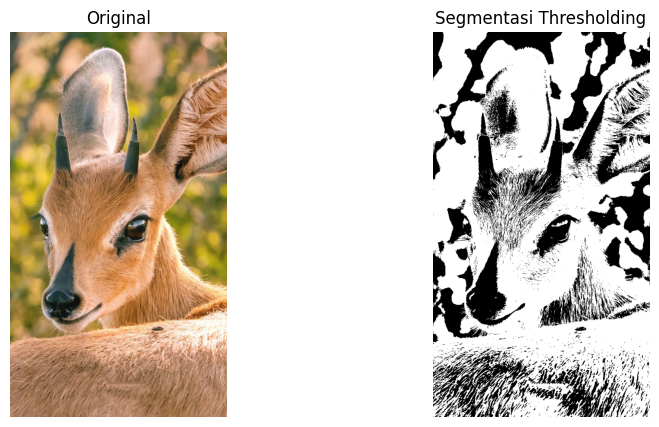

Segmentasi Thresholding selesai, disimpan sebagai output_threshold.jpg


In [ ]:
# Segmentasi menggunakan image thresholding
def image_threshold(img, threshold=128):
    grayscale = img.convert("L")
    binary = grayscale.point(lambda p: 255 if p > threshold else 0)
    return binary

# Fungsi untuk menampilkan perbandingan gambar
def show_comparison(original, processed, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap="gray")
    plt.title(title)
    plt.axis('off')
    plt.show()

# Penggunaan Fitur
if __name__ == "__main__":
    image_path = "/content/rusa.jpeg"
    img = load_image(image_path)

   # Segmentasi Thresholding
    threshold_img = image_threshold(img)
    threshold_img.save("output_threshold.jpg")
    show_comparison(img, threshold_img, "Segmentasi Thresholding")
    print("Segmentasi Thresholding selesai, disimpan sebagai output_threshold.jpg")

### Mengubah citra menjadi image negative
Image negative membalikkan warna gambar. Warna terang menjadi gelap, dan sebaliknya.



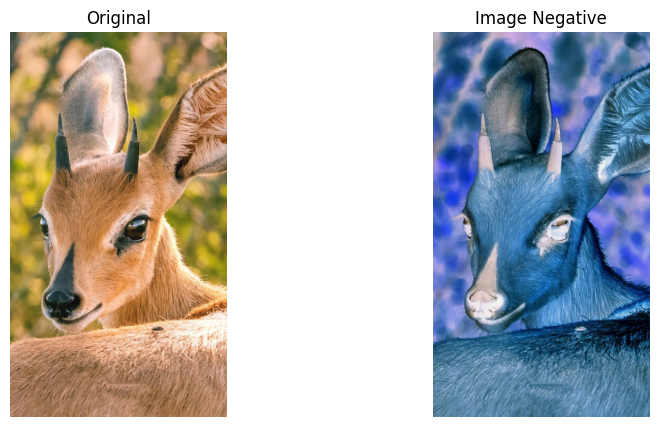

Image Negative selesai, disimpan sebagai output_negative.jpg


In [ ]:
# Mengubah citra menjadi image negative
def image_negative(img):
    return ImageOps.invert(img.convert("RGB"))

# Fungsi untuk menampilkan perbandingan gambar
def show_comparison(original, processed, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap="gray")
    plt.title(title)
    plt.axis('off')
    plt.show()

# Penggunaan Fitur
if __name__ == "__main__":
    image_path = "/content/rusa.jpeg"
    img = load_image(image_path)

# Image Negative
    negative_img = image_negative(img)
    negative_img.save("output_negative.jpg")
    show_comparison(img, negative_img, "Image Negative")
    print("Image Negative selesai, disimpan sebagai output_negative.jpg")

### Meningkatkan kontras citra/contrast stretching
Contrast stretching (peregangan kontras) bertujuan memperluas rentang intensitas gambar, terutama jika gambar terlihat kusam atau redup.

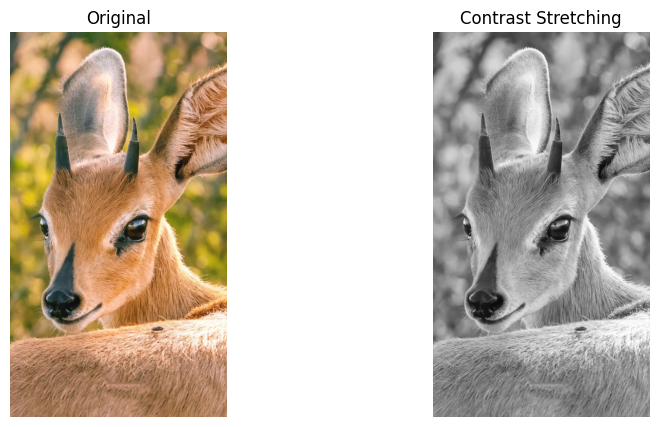

Contrast Stretching selesai, disimpan sebagai output_contrast.jpg


In [ ]:
# Meningkatkan kontras citra (contrast stretching)
def contrast_stretching(img):
    img_array = np.array(img.convert("L"))
    min_val = np.min(img_array)
    max_val = np.max(img_array)
    stretched = ((img_array - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    return Image.fromarray(stretched)

# Fungsi untuk menampilkan perbandingan gambar
def show_comparison(original, processed, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap="gray")
    plt.title(title)
    plt.axis('off')
    plt.show()

# Penggunaan Fitur
if __name__ == "__main__":
    image_path = "/content/rusa.jpeg"
    img = load_image(image_path)

 # Contrast Stretching
    contrast_img = contrast_stretching(img)
    contrast_img.save("output_contrast.jpg")
    show_comparison(img, contrast_img, "Contrast Stretching")
    print("Contrast Stretching selesai, disimpan sebagai output_contrast.jpg")

### Cropping citra menggunakan image subtraction
Cropping biasanya memotong gambar ke area tertentu. Tapi dengan Image Subtraction, kita bisa memotong berdasarkan perbedaan dua gambar (original vs background).

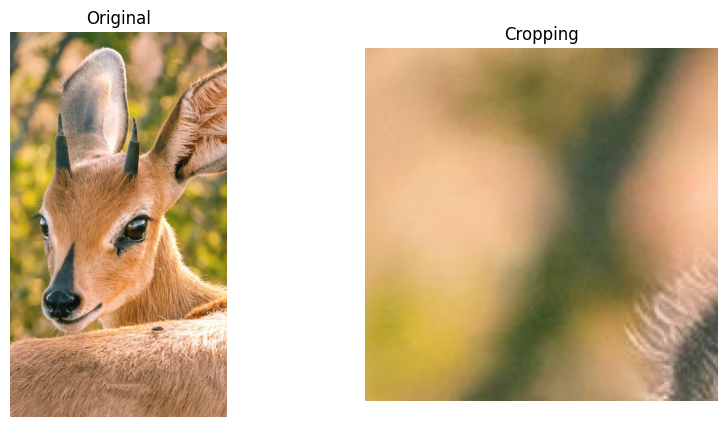

Cropping selesai, disimpan sebagai output_crop.jpg


In [ ]:
# Cropping citra menggunakan image subtraction
def image_crop(img, crop_box):
    cropped = img.crop(crop_box)
    return cropped

# Fungsi untuk menampilkan perbandingan gambar
def show_comparison(original, processed, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap="gray")
    plt.title(title)
    plt.axis('off')
    plt.show()

# Penggunaan Fitur
if __name__ == "__main__":
    image_path = "/content/rusa.jpeg"
    img = load_image(image_path)

  # Cropping
    cropped_img = image_crop(img, (50, 50, 200, 200))
    cropped_img.save("output_crop.jpg")
    show_comparison(img, cropped_img, "Cropping")
    print("Cropping selesai, disimpan sebagai output_crop.jpg")

### Normalisasi histogram dari citra
Histogram normalization (juga dikenal sebagai Histogram Equalization) bertujuan meratakan distribusi intensitas piksel, terutama pada gambar dengan kontras buruk.

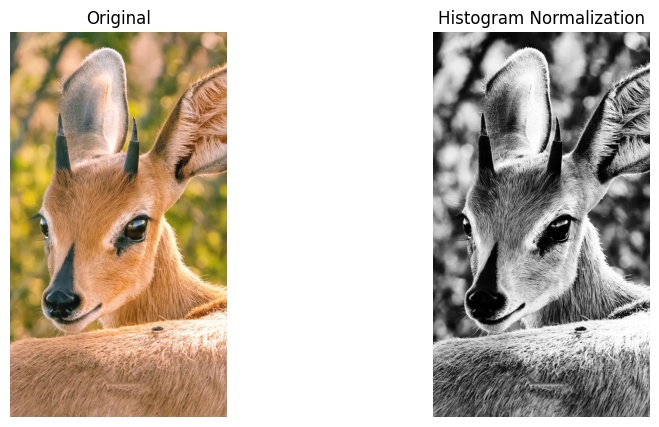

Histogram Normalization selesai, disimpan sebagai output_histogram_normalization.jpg


In [ ]:
# Normalisasi histogram dari citra
def histogram_normalization(img):
    img_array = np.array(img.convert("L"))
    hist, bins = np.histogram(img_array.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    img_normalized = np.interp(img_array.flatten(), bins[:-1], cdf_normalized)
    return Image.fromarray(img_normalized.reshape(img_array.shape).astype(np.uint8))

# Fungsi untuk menampilkan perbandingan gambar
def show_comparison(original, processed, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap="gray")
    plt.title(title)
    plt.axis('off')
    plt.show()

# Penggunaan Fitur
if __name__ == "__main__":
    image_path = "/content/rusa.jpeg"
    img = load_image(image_path)

  # Histogram Normalization
    hist_norm_img = histogram_normalization(img)
    hist_norm_img.save("output_histogram_normalization.jpg")
    show_comparison(img, hist_norm_img, "Histogram Normalization")
    print("Histogram Normalization selesai, disimpan sebagai output_histogram_normalization.jpg")